#Introdução

A intenção desse notebook é fazer uma revisão bem rápida em alguns conceitos importantes de estatística, e uma introdução básica sobre testes de hipótese. Basicamente, os conceitos basilares que precisam ser compreendidos para que possamos realizar quantos testes de hipóteses quisermos! Espero que lhe seja útil.

#Revisão - Estatística

Antes de iniciar os primeiros passos com um teste de hipótese, existem alguns conceitos que serão essenciais para nossos testes, e que vocês já devem estar com eles na ponta da língua!

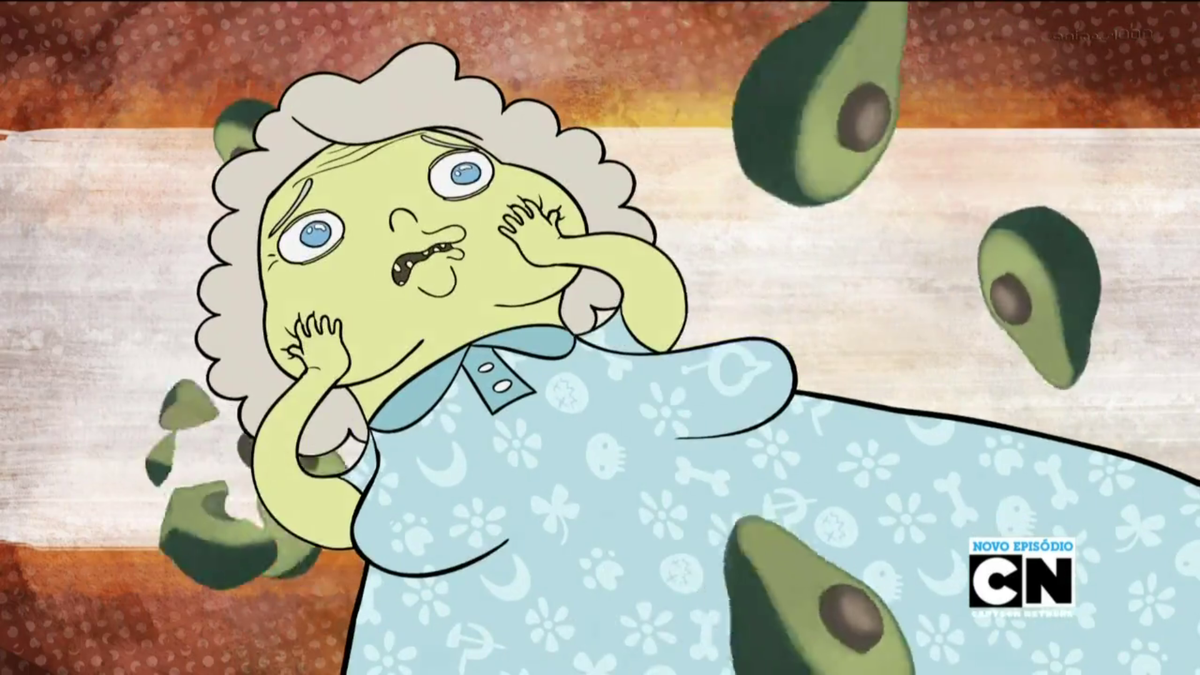

In [ ]:
import seaborn as sns
import random
import numpy as np
from scipy import stats
import statistics

##Distribuições

Não vou falar de muitas aqui. Somente de duas. Mas, vale a pena pesquisar sobre as outras também. Se estiver interessado, clica [aqui](https://pt.khanacademy.org/math/statistics-probability/sampling-distributions-library).

###Distribuição Normal

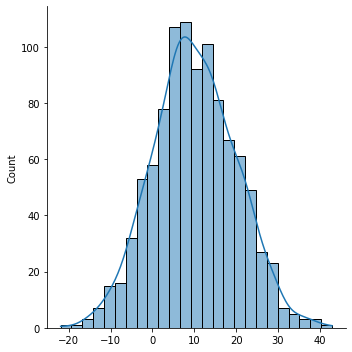

In [ ]:
distribuicao_normal = np.random.normal(10, 10, 1000)
sns.displot(distribuicao_normal, kde = True)

Isso que você está vendo aí em cima é uma distribuição normal. Distribuições normais geralmente aparecem em eventos naturais. Como assim eventos naturais? Bom, a média de altura da população é um ótimo exemplo. São raras as ocasiões em que uma pessoa se distancia muito da média, seja sendo extremamente alto, ou extremamente baixo.

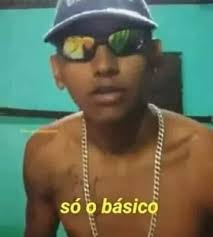

Distribuições normais também são simétricas. Ambos os lados têm tamanhos iguais. E quando uma distribuição tem tamanhos diferentes pra cada lado? Bom, aí é que nós chamamos de right-skew e left-skew. A distribuição tombada pra direita é right-skewed, a tombada pra esquerda é left-skewed. E lembrando, a sua direita é a esquerda da distribuição!

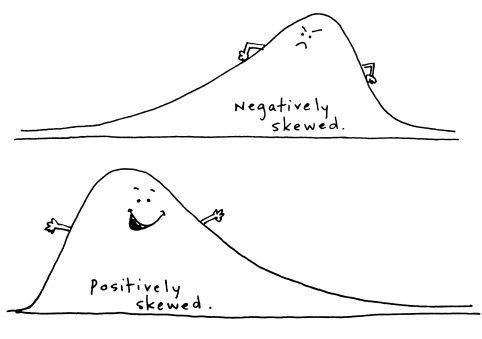

###Distribuição t de Student

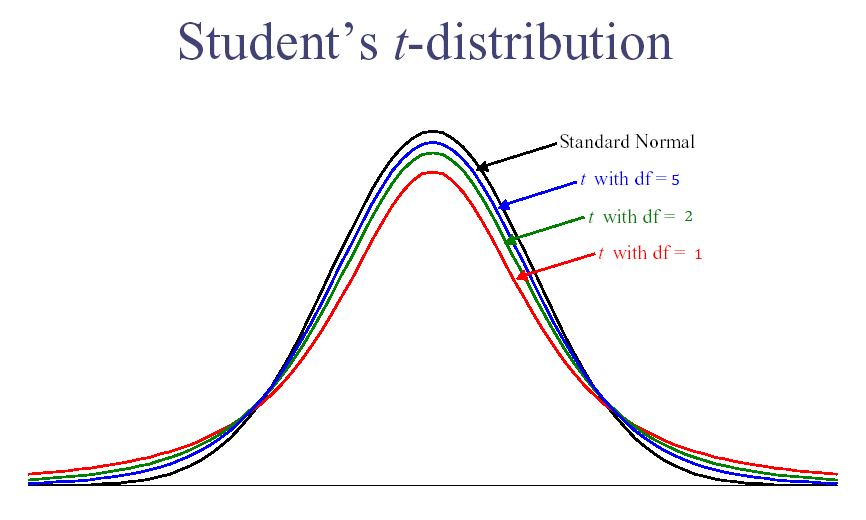

Ela se parece muito com a distribuição normal, mas suas caudas são mais largas, por haver menor recorrência de valores extremos. Normalmente utiliza-se amostras bem menores que a população.

##Média, Moda e Mediana

###Média

In [ ]:
media_de_uma_amostra = np.mean(distribuicao_normal)
print("O valor da nossa média é de {0:.2f}.".format(round(media_de_uma_amostra,2)))

O valor da nossa média é de 10.08.


Para calcular a média, some o valor de todas as amostras e divida pelo número de amostras.

###Mediana

In [ ]:
mediana_de_uma_amostra = np.median(distribuicao_normal)
print("O valor da nossa mediana é de {0:.2f}.".format(round(mediana_de_uma_amostra,2)))

O valor da nossa mediana é de 9.69.


Para descobrir a mediana, organize as suas amostras de forma crescente. Descubra o valor que fica exatamente no meio da amostra. Caso seja uma distribuição com numero par de amostras, pegue os dois numeros do meio, de maneira que para cada lado haja exatamente o mesmo número de amostras, e tire a média desses dois números.

###Moda

In [ ]:
moda_de_uma_amostra = stats.mode(distribuicao_normal)
print("O valor da nossa moda é de {}.".format(moda_de_uma_amostra.mode))

O valor da nossa moda é de [-21.94046186].


A moda é o valor que aparece com mais frequẽncia na sua amostra.

##Variância

In [ ]:
var_da_amostra = np.var(distribuicao_normal)
print('Nossa variância é de {0:.2f} em relação à média'.format(var_da_amostra))

Nossa variância é de 96.98 em relação à média


O cálculo da variância é calcular a média dos dados, subtrair cada valor da amostra pela média, elevar cada resultado da subtração ao quadrado, somar o resultado e dividir pelo número de total de observações.


###Desvio Padrão

O desvio padrão é nada mais que a raiz quadrada da variância. A vantagem de utilizar o desvio padrão, ao invés da variância, é que com o desvio padrão podemos utilizar a mesma unidade de medida das amostras.

In [ ]:
desvio_pad_amostra = np.std(distribuicao_normal)
print('Nosso desvio padrão é de {0:.2f} em relação à média.'.format(desvio_pad_amostra))

Nosso desvio padrão é de 9.85 em relação à média.


O que realmente podemos fazer com essa métrica? Bom, vamos supor que nossa distribuição_amostral tenha dados da altura de pessoas. Com o desvio padrão de x, podemos dizer que em média, as pessoas tem uma altura Y, com desvio Y + x e Y - x.

##Correlação

In [ ]:
corr_normal = np.corrcoef(distribuicao_normal)
print('A correlção entre os dados é de {}.'.format(corr_normal))

A correlção entre os dados é de 1.0.


Quanto mais próximo o valor for de 1, mais forte é a correlação entre as variáveis, se o valor for 0 então não há correlação e quanto mais próximo o valor for de -1, maior é a anticorrelação entre as variáveis.

Bom, espero que você tenha conseguido acompanhar até aqui. Se precisar, volte, troque os valores. Isso tem de estar muito bem definido para caminharmos sem percalços.

#Introdução ao Teste de Hipóteses


Creio que um bom entendimento de teste de hipóteses pode facilitar muito o trabalho em projetos de Data Science. De maneira nenhuma tenho a intenção de esgotar o assunto. Caso queiram pesquisar mais sobre os códigos em Python, cabe uma pesquisa individual.

https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests


Não sou nenhum especialista, e a intenção desse notebook é clarear conceitos, aceitando sem sombra de dúvidas sugestões e feedbacks. **Por favor, dêem sugestões e feedbacks.**

##O que é um teste de hipótese?


Um teste de hipótese é um procedimento estatístico para testar uma hipótese... Duh! Podemos **rejeitar** ou **não rejeitar** uma hipótese. Não priemos cânico! Quando não rejeitamos uma hipótese, isso não quer dizer que estamos aceitando ela. Normalmente não temos dados suficientes para saber se uma hipótese é verdadeira. Nós até podemos ter, mas isso não faz parte do escopo do nosso teste.

Para não dizer nada com nada, **o que é uma hipótese?**

Uma hipótese é uma hipótese! "É uma previsão do que será encontrado no resultado de um projeto de pesquisa e normalmente é focada na relação entre duas variáveis ​​diferentes estudadas na pesquisa. Geralmente é baseado em expectativas teóricas sobre como as coisas funcionam e em evidências científicas já existentes." ([O que é uma hipótese?](https://https://www.greelane.com/pt/ci%C3%AAncia-tecnologia-matem%C3%A1tica/ci%C3%AAncias-sociais/definition-and-types-of-hypothesis-3026350/))


##Hipóteses nula ou alternativa


Dentro de um teste de hipótese temos um enunciado, daonde tiramos duas informações: a hipótese nula e a hipótese alternativa. Normalmente representamos como H0 e H1 ou HA, respectivamente.

*A altura média de mulheres universitárias difere de 1,55 m?*

In [ ]:
#Hipótese nula
altura_media = 1.55

#Hipótese alternativa
altura_media != 1.55

Os estudantes do sexo masculino e feminino diferem na altura, em média?



```
#Hipótese nula
altura_media_masc = altura_media_fem

#Hipótese alternativa
altura_media_masc != altura_media_fem
```



A hipótese nula sempre possuirá sinal de igualdade, mas ela pode ser acompanhada de > ou <. Basicamente, se a hipótese nula for H0 = x, a hipótese alternativa deve ser H1 != x. Se a hipótese nula for H0 <= x, a hipótese alternativa deve ser H1 > x. Se a hipótese nula for H0 >= x, a hipótese alternativa deve ser H1 < x. Meio chatinho né?

Mas, aprender isso será muito importante mais pra frente!

##Testes unilaterais ou bilaterais


Os testes serão unilaterais ou bilaterais.

Testes unilaterais definem a hipótese alternativa como **maior** ou **menor** que a hipótese nula. *Lembrando*, a hipótese nula deve ser imediatamente contrária à hipótese alternativa.

Vou exemplificar na linguagem de Python pra ficar mamão com açúcar pra você!

```
if hipotese_nula == x:
    hipotese_alternativa != x

if hipotese_nula <= x:
    hipotese_alternativa > x

if hipotese_nula >= x:
    hipotese_alternativa < x
```

obs.: não use esse tanto de "if" no seu código real ok?

##Erros


Dentro de um teste de hipóteses temos dois tipos de erros. O erro do Tipo I e o erro do Tipo II... O quê? Achou que não ia ter erro?

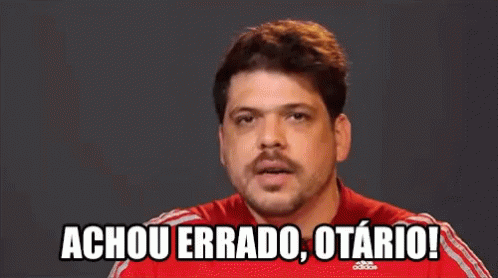

**AVISO**: esse notebook conterá vários memes do Choque de Cultura!

"Como o teste é baseado em probabilidades, sempre há uma possibilidade de chegar a uma conclusão errada. Quando você realiza um teste de hipóteses, dois tipos de erros são possíveis: tipo I e tipo II. Os riscos desses dois erros estão inversamente relacionados e são determinados pelo nível de significância e o poder do teste. Portanto, você deve determinar qual erro tem consequências mais severas para sua situação antes que você defina seus riscos." ([fonte](https://support.minitab.com/pt-br/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/type-i-and-type-ii-error/))



###Erros do Tipo I

Temos uma hipótese.

De alguma forma, temos conhecimento de que ela é verdadeira (não durante o teste, senão seria muito fácil!).

Porém, através do nosso teste, nós REJEITAMOS a hipótese nula (a hipótese verdadeira). Como isso aconteceu? Só Deus sabe! Mas, lembre-se, sempre existe uma possibilidade de cometer erros.

Vou dar um exemplo:

O pesquisador médico deseja comparar a eficácia de dois medicamentos. As hipóteses nula e alternativa são:

    Hipótese nula (H0): μ1= μ2

    Os dois medicamentos são igualmente eficazes.

    Hipótese alternativa (H1): μ1≠ μ2

    Os dois medicamentos não são igualmente eficazes.

Um erro do tipo I ocorre se o pesquisador rejeita a hipótese nula e conclui que os dois medicamentos são diferentes quando, de fato, eles não são. 

###Erros do Tipo II

Esse aqui é o tipo de erro mais grave. É quando a hipótese nula é falsa, mas nós concluímos que ela é verdadeira? E por que ela é mais grave que o Tipo I?

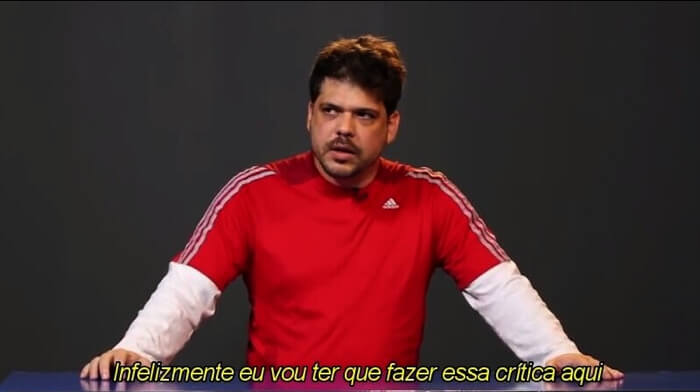

Bom, temos vários cenários. Imagine um juiz, que está julgando um réu. O réu é inocente. Mas, o juiz o declara culpado! Esse é o erro do Tipo I. Grave! Com certeza. Porém, um outro juiz está julgando um réu por assassinato, ou roubo, ou qualquer outra coisa grave. Se o juiz o declarar inocente, ele estará cometendo um erro do Tipo II, já que nosso réu é culpado. 

Pior do que prender um inocente é deixar livre um culpado!

##Nível de confiança

Bom, já que nós vamos errar, vamos errar direito. Antes de começarmos a coletar nossos dados e realizar nossos testes precisamos definir um nível de confiança desejado para nosso teste. 

O nível de confiança representa a porcentagem de intervalos que iriam incluir o parâmetro populacional se você reunisse amostras da mesma população, repetidas vezes. Um nível de confiança de 95% normalmente funciona bem. Isso indica que, se você tiver coletado uma centena de amostras, e tiver calculado 95% de intervalos de confiança, você esperaria que aproximadamente 95 dos intervalos contivesse o parâmetro populacional, como a média da população ([link](https://support.minitab.com/pt-br/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/what-is-a-confidence-level/))

In [ ]:
nivel_de_confianca = 0.95

Vale lembrar que na maioria dos cálculos que fizermos com esse nível de confiança a estatística lida sempre com probabilidades com números entre 0 e 1. 95% = 0.95

###Margem de erro

Para calcular a margem de erro, número base para rejeitar ou não rejeitar uma hipótese a partir do p-valor (a gente vai falar dele aqui também), devemos calcular 1 - nivel_de_confiança.



In [ ]:
margem_de_erro = 1 - nivel_de_confianca
print("O valor da nossa margem de erro é de {0:.2f}.".format(round(margem_de_erro,2)))

O valor da nossa margem de erro é de 0.05.
